In [72]:
from numpy import *
import matplotlib.pyplot as plt
#获取各个数据对应的类别标签
def loadDataSet():
    dataMat = []
    labelMat = []
    fl = open('D:\\myOwnData\\digits\\testSet.txt')
    for line in fl.readlines():  #逐行读取
        lineArr = line.strip().split()  #strip去掉首尾，split按照空格来划分
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        #x0默认为1，然后添加lineArr的0和1个元素为x1，x2
        
        labelMat.append(int(lineArr[2]))  #将标签添加到labeMat
    return dataMat, labelMat

#定义sigmoid函数
def sigmoid(inX):
    return 1.0/(1+exp(-inX))

#梯度下降算法（按照书里是梯度上升）
def gradAscent(dataMatIn, classLabels):
    dataMatrix = mat(dataMatIn)  #把dataMatIn转化为Numpy矩阵
    labelMat = mat(classLabels).transpose()  #将label进行转置
    row,col = shape(dataMatrix)  #获取数据的行和列大小
    alpha = 0.01 #更新步长
    maxCycle = 900  #500轮次
    weights = ones((col,1))  #权重初始化
    for k  in range(maxCycle):
        h = sigmoid(dataMatrix*weights)  #获得预测值
        error = labelMat - h          #预测值与真实值之间误差
        weights = weights + alpha * dataMatrix.transpose() * error  #更新权重
    return weights
    

In [85]:
dataArr, labelMat = loadDataSet()
gradAscent(dataArr, labelMat)

matrix([[13.21097823],
        [ 1.14789242],
        [-1.79742822]])

In [150]:
import matplotlib.pyplot as plt
def plotBestFit(weights):
    dataMat, labelMat = loadDataSet()  #加载数据集
    dataArr = array(dataMat)  #转换成numpy的array数组
    num = shape(dataArr)[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(num):
        if int(labelMat[i] ==1):
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = arange(-3.0,3.0,0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    y = y.transpose()
    ax.plot(x, y)
    plt.xlabel('x1'); plt.ylabel('x2')
    plt.show()

def plotError(rangeX,errorArray,maxCycle):
    fig = plt.figure()
    plt.plot(rangeX,errorArray,linewidth=2)
    plt.xticks(arange(0, maxCycle, maxCycle/10)) # 设置横坐标轴的刻度为 0 到 10 的数组
    plt.ylim([0, 20]) # 设置纵坐标轴范围为 -2 到 2
    plt.xlabel('times of training cercle'); plt.ylabel('error')

In [ ]:
def sGradAscent0(dataMatrix, classLabels):
    row, col = shape(dataMatrix)
    alpha = 0.01
    weights = ones(col)
    maxCycle = 1000  #500轮次
    errorArray = []
    rangex = []
    for k in range(maxCycle):
        sumError = 0
        for i in range(row):
            h = sigmoid(sum(dataMatrix[i]*weights))
            error = classLabels[i] - h
            weights = weights + alpha * error * float_(dataMatrix[i])
            sumError += error
        errorArray.append(sumError)
        rangex.append(k)
    return weights,rangex,errorArray,maxCycle

In [158]:
#改进后的随机梯度下降
def sGradAscent1(dataMatrix, classLabels, numIter = 150):
    row,col = shape(dataMatrix)
    weights = ones(col)
    errorArray = []
    rangex = []
    for j in range(numIter):
        dataIndex = list(range(row))
        sumError = 0
        for i in range(row):
            alpha = 4/(1.0+j+i)+0.01
            randIndex = int(random.uniform(0,len(dataIndex)))
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * float_(dataMatrix[randIndex])
            del(dataIndex[randIndex])
            sumError += error
        errorArray.append(sumError)
        rangex.append(j)
    return weights,rangex,errorArray,numIter

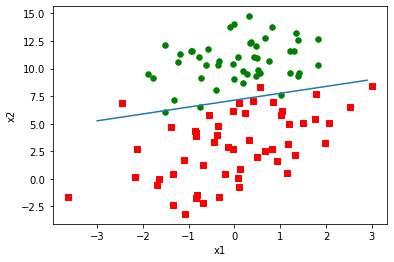

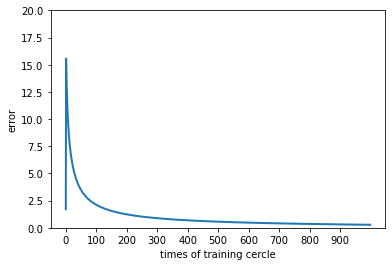

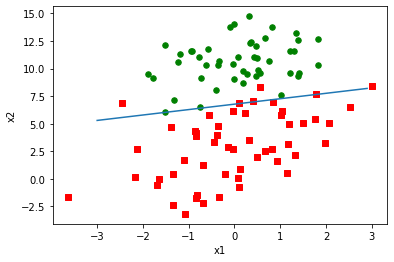

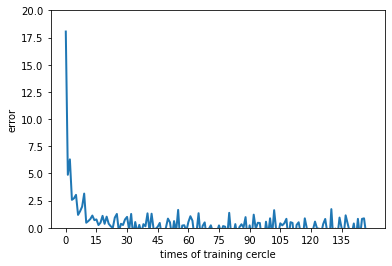

In [159]:
dataArr, labelMat = loadDataSet()
weights,rangeX,errorArray,maxCycle = sGradAscent0(dataArr, labelMat)
plotBestFit(weights)
plotError(rangeX,errorArray,maxCycle)
weights,rangeX,errorArray,maxCycle = sGradAscent1(dataArr, labelMat)
plotBestFit(weights)
plotError(rangeX,errorArray,maxCycle)